# CS312 DATA ANALYTICS EXAM
Dipean Dasgupta<br>
202151188


In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
DS1=pd.read_csv('/content/drive/MyDrive/CS312_DA/R_data.csv')

In [ ]:
DS1.set_index("Country Name", inplace=True)

In [ ]:
DS1.loc[DS1['Series Name'] == 'Births attended by skilled health staff (% of total)', 'Series Name'] = 'Births'
DS1.loc[DS1['Series Name'] == 'Current health expenditure (% of GDP)', 'Series Name'] = 'Health'

In [ ]:
DS1.drop(columns=["Series Code", "Country Code"], inplace=True)


In [ ]:
b_df = DS1[DS1['Series Name']=='Births'].drop(columns='Series Name')
h_df = DS1[DS1['Series Name']=='Health'].drop(columns='Series Name')
b_df.columns = pd.MultiIndex.from_product([['Births'], b_df.columns])
h_df.columns = pd.MultiIndex.from_product([['Health'], h_df.columns])


In [ ]:
j_df = b_df.join(h_df,lsuffix='_x', rsuffix='_y')
j_df

Births                              \
                            2012 [YR2012] 2013 [YR2013] 2014 [YR2014]   
Country Name                                                            
Afghanistan                          39.9            ..          45.2   
Africa Eastern and Southern            ..            ..            ..   
Africa Western and Central             ..            ..            ..   
Albania                                ..            ..            ..   
Algeria                                ..          96.6            ..   
...                                   ...           ...           ...   
West Bank and Gaza                     ..            ..          99.6   
World                                  ..            ..            ..   
Yemen, Rep.                          34.4          44.7            ..   
Zambia                                 ..            ..          64.2   
Zimbabwe                               ..            ..            80   

                                                                       \
                            2015 [YR2015] 2016 [YR2016] 2017 [YR2017]   
Country Name                                                            
Afghanistan                          50.5            ..          53.4   
Africa Eastern and Southern            ..            ..            ..   
Africa Western and Central             ..            ..            ..   
Albania                                ..            ..            ..   
Algeria                                ..            ..            ..   
...                                   ...           ...           ...   
West Bank and Gaza                     ..            ..            ..   
World                                  ..            ..            ..   
Yemen, Rep.                            ..            ..            ..   
Zambia                                 ..            ..            ..   
Zimbabwe                             78.1            ..            ..   

                                                                           \
                            2018 [YR2018]     2019 [YR2019] 2020 [YR2020]   
Country Name                                                                
Afghanistan                          58.8                ..          61.8   
Africa Eastern and Southern            ..  69.4114299453955            ..   
Africa Western and Central             ..  55.8282412083194            ..   
Albania                              99.8                ..            ..   
Algeria                                ..              98.8            ..   
...                                   ...               ...           ...   
West Bank and Gaza                     ..                ..          99.7   
World                                  ..  82.5578165464599            ..   
Yemen, Rep.                            ..                ..            ..   
Zambia                               80.4              80.4            ..   
Zimbabwe                               ..                86            ..   

                                                     Health                    \
                            2021 [YR2021]     2012 [YR2012]     2013 [YR2013]   
Country Name                                                                    
Afghanistan                            ..        7.89716864        8.80596447   
Africa Eastern and Southern            ..  6.15246595409235  6.20676639621933   
Africa Western and Central             ..  3.49743654970278  3.61331551713385   
Albania                                ..        6.09262609        6.27234411   
Algeria                                ..        6.00050974        6.03576279   
...                                   ...               ...               ...   
West Bank and Gaza                     ..                ..                ..   
World                                  ..  9.35857405623131  9.32880556598518   
Yemen, Rep.        

In [ ]:
cols_convert = j_df.columns[0:]
j_df[cols_convert] = j_df[cols_convert].replace("..", pd.NA)
j_df[cols_convert] = j_df[cols_convert].apply(pd.to_numeric, errors='coerce')
col_avg = j_df[cols_convert].mean()
j_df[cols_convert] = j_df[cols_convert].fillna(col_avg)
j_df

Births                              \
                            2012 [YR2012] 2013 [YR2013] 2014 [YR2014]   
Country Name                                                            
Afghanistan                     39.900000     91.753869     45.200000   
Africa Eastern and Southern     91.605236     91.753869     92.139612   
Africa Western and Central      91.605236     91.753869     92.139612   
Albania                         91.605236     91.753869     92.139612   
Algeria                         91.605236     96.600000     92.139612   
...                                   ...           ...           ...   
West Bank and Gaza              91.605236     91.753869     99.600000   
World                           91.605236     91.753869     92.139612   
Yemen, Rep.                     34.400000     44.700000     92.139612   
Zambia                          91.605236     91.753869     64.200000   
Zimbabwe                        91.605236     91.753869     80.000000   

                                                                       \
                            2015 [YR2015] 2016 [YR2016] 2017 [YR2017]   
Country Name                                                            
Afghanistan                     50.500000     92.164435     53.400000   
Africa Eastern and Southern     93.310107     92.164435     93.769064   
Africa Western and Central      93.310107     92.164435     93.769064   
Albania                         93.310107     92.164435     93.769064   
Algeria                         93.310107     92.164435     93.769064   
...                                   ...           ...           ...   
West Bank and Gaza              93.310107     92.164435     93.769064   
World                           93.310107     92.164435     93.769064   
Yemen, Rep.                     93.310107     92.164435     93.769064   
Zambia                          93.310107     92.164435     93.769064   
Zimbabwe                        78.100000     92.164435     93.769064   

                                                                       \
                            2018 [YR2018] 2019 [YR2019] 2020 [YR2020]   
Country Name                                                            
Afghanistan                      58.80000     90.446895     61.800000   
Africa Eastern and Southern      92.90121     69.411430     96.283095   
Africa Western and Central       92.90121     55.828241     96.283095   
Albania                          99.80000     90.446895     96.283095   
Algeria                          92.90121     98.800000     96.283095   
...                                   ...           ...           ...   
West Bank and Gaza               92.90121     90.446895     99.700000   
World                            92.90121     82.557817     96.283095   
Yemen, Rep.                      92.90121     90.446895     96.283095   
Zambia                           80.40000     80.400000     96.283095   
Zimbabwe                         92.90121     86.000000     96.283095   

                                                 Health                \
                            2021 [YR2021] 2012 [YR2012] 2013 [YR2013]   
Country Name                                                            
Afghanistan                     74.183333      7.897169      8.805964   
Africa Eastern and Southern     74.183333      6.152466      6.206766   
Africa Western and Central      74.183333      3.497437      3.613316   
Albania                         74.183333      6.092626      6.272344   
Algeria                         74.183333      6.000510      6.035763   
...                                   ...           ...           ...   
West Bank and Gaza              74.183333      6.190772      6.301491   
World                           74.183333      9.358574      9.328806   
Yemen, Rep.                     74.183333      5.195935      4.960832   
Zambia                          74.183333      3.930529      4.690910   
Zimbabwe         

In [ ]:
#Question1_answer
j_df.loc["India", ("Births","2019 [YR2019]")]

90.44689481406408

In [ ]:
#Question2_answer
health_column = j_df.xs('2016 [YR2016]', level=1, axis=1)['Health']
max_health_expenditure_country = health_column.idxmax()
min_health_expenditure_country = health_column.idxmin()
print(max_health_expenditure_country)
print(min_health_expenditure_country)

United States
Monaco


In [ ]:
#Question3_answer
avg_skilled_births_2014 = j_df.xs('2014 [YR2014]', level=1, axis=1)['Births'].mean()
print(avg_skilled_births_2014)

92.13961231080874


In [ ]:
#Question4_answer
india_skilled_births_2014 = j_df.xs('2014 [YR2014]', level=1, axis=1).loc['India', 'Births']
#print(india_skilled_births_2014)
india_skilled_births_2020 = j_df.xs('2020 [YR2020]', level=1, axis=1).loc['India', 'Births']
countries_with_higher_skilled_births = (j_df.xs('2020 [YR2020]', level=1, axis=1)['Births'] > india_skilled_births_2020).sum()
print(countries_with_higher_skilled_births)

34


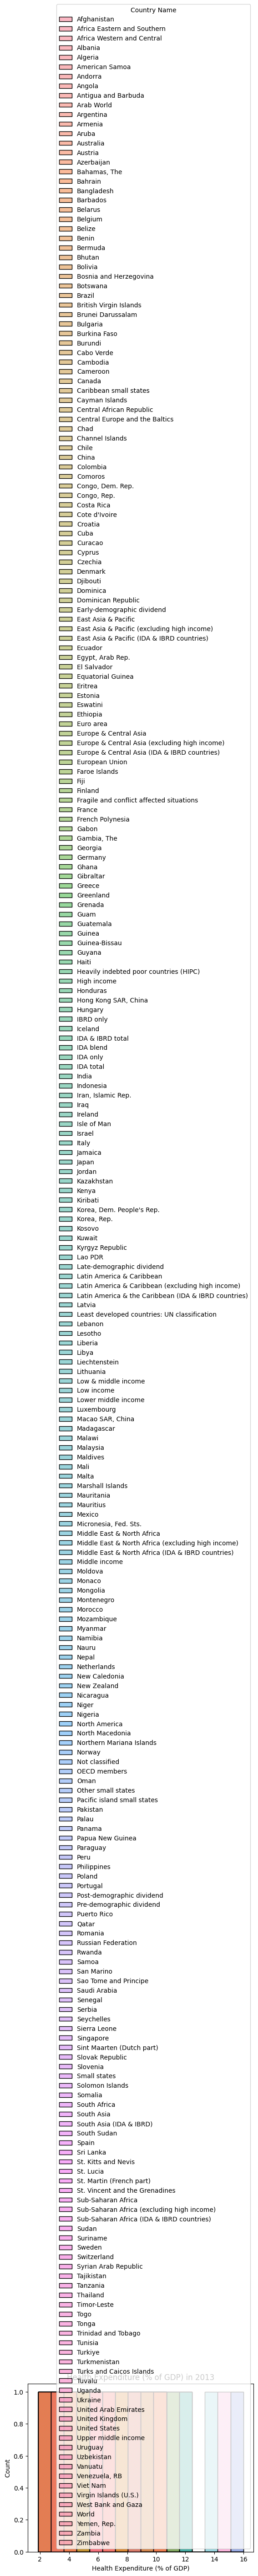

In [ ]:
#Question5_solution
health_expenditure_2013 = j_df.xs('2013 [YR2013]', level=1, axis=1)['Health']
health_expenditure_df = health_expenditure_2013.reset_index().rename(columns={'index': 'Country Name'})
sns.histplot(data=health_expenditure_df, x='Health', hue='Country Name')
plt.title('Health Expenditure (% of GDP) in 2013')
plt.xlabel('Health Expenditure (% of GDP)')
plt.ylabel('Count')
plt.savefig('health_expenditure_2013_202151188.jpg')